# Clustering and Association

## Part 1: Clustering

### Goal and Data

Our goal is to find optimal locations for drone depots for a drone-delivery system. We use a dataset containing x and y coordinates for a set of customers.


First we import our tools and read our data in to a dataframe:

In [2]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


clocs = pd.read_csv('drone_cust_locations.csv', sep=';')
clocs2 = clocs

Here is how our data looks like:

In [4]:
clocs.head()

,clientid,x,y
0,1,622.771572,164.857623
1,2,416.357298,630.193634
2,3,292.735020,567.333231
3,4,737.211288,166.225676
4,5,540.475375,682.912298


In [5]:
clocs.dtypes

clientid      int64
x           float64
y           float64
dtype: object

In [6]:
x_vals = clocs['x']
y_vals = clocs['y']

We also check that we do not have any null values:

In [8]:
clocs.isnull().values.any()

False

### Fitting 

We use the k-means clustering algorithm to assign depots to each of our customers. For this first test we try with 3 depot locations. We receive centroids which are the fitted optimal co-ordinates of our depots, as well as a list of the assigned depot for each of our customers:

In [10]:
from sklearn.cluster import KMeans
k = 3

st = time.time()
model = KMeans(init='random', n_clusters=k, random_state=42)
model.fit(clocs[['x','y']])
et = time.time()
elapsed_time = et - st

In [11]:
labels = model.labels_
labels

array([0, 2, 1, ..., 1, 0, 0])

In [12]:
model.cluster_centers_ 


array([[702.08109226, 211.2703835 ],
       [198.44098904, 383.25861847],
       [548.20586479, 787.2788963 ]])

In [13]:
clocs['Depot'] = labels

In [14]:
clocs.head()

,clientid,x,y,Depot
0,1,622.771572,164.857623,0
1,2,416.357298,630.193634,2
2,3,292.735020,567.333231,1
3,4,737.211288,166.225676,0
4,5,540.475375,682.912298,2


We assign a "Depot" column to our dataframe and check our calculated depot locations.

In [16]:
centers = model.cluster_centers_ 

In [17]:
centers


array([[702.08109226, 211.2703835 ],
       [198.44098904, 383.25861847],
       [548.20586479, 787.2788963 ]])

In [18]:
xarr = []
yarr = []
for x in centers:
    xarr.append(x[0])
    yarr.append(x[1])

### Plotting

We plot a scatterplot showing our customer locations, each depot location is marked with a red plus sign and customers assigned to differing depots are drawn using different colors.

It seems we got a fairly sensical distribution for our depots, with well defined border lines. A geopgraphical interpretation for our dataset could be a river or other geopgraphical element which mostly prohibits buildings. A river seems most likely, the couple outlying datapoints could be on an island.



Fit time: 0.8357648849487305 seconds


F:\Stuff\Pandas\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
F:\Stuff\Pandas\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
F:\Stuff\Pandas\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


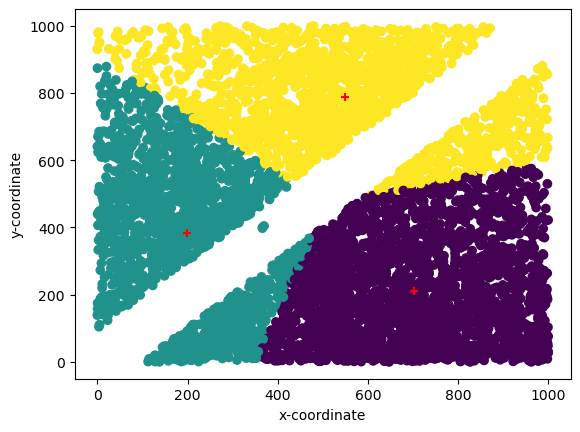

In [20]:
d = clocs['Depot']

print('Fit time:', elapsed_time, 'seconds')
plt.scatter(x_vals, y_vals, c = d)
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.scatter(xarr, yarr, marker = '+', c = 'red')
plt.show()

### Testing with more depots

Now we try the same with 10 depots.

Fit time: 0.7260575294494629 seconds


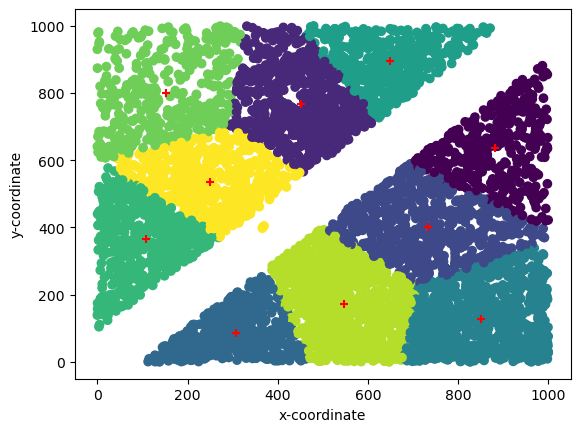

In [22]:
k = 10

st = time.time()
model = KMeans(init='random', n_clusters=k, random_state=42)
model.fit(clocs2[['x','y']])
et = time.time()
elapsed_time = et - st
print('Fit time:', elapsed_time, 'seconds')

labels = model.labels_
clocs2['Depot'] = labels
centers = model.cluster_centers_ 
xarr = []
yarr = []
for x in centers:
    xarr.append(x[0])
    yarr.append(x[1])

d = clocs['Depot']

plt.scatter(x_vals, y_vals, c = d)
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.scatter(xarr, yarr, marker = '+', c = 'red')
plt.show()

In [23]:
clocs.head()

,clientid,x,y,Depot
0,1,622.771572,164.857623,8
1,2,416.357298,630.193634,1
2,3,292.735020,567.333231,9
3,4,737.211288,166.225676,4
4,5,540.475375,682.912298,1


In [24]:
clocs = clocs.drop(columns='Depot')

In [25]:
clocs.head()

,clientid,x,y
0,1,622.771572,164.857623
1,2,416.357298,630.193634
2,3,292.735020,567.333231
3,4,737.211288,166.225676
4,5,540.475375,682.912298


### Testing agglomerative clustering

Here we test the same problem with agglomerative clustering algorithm and interestingly get a slightly different result:

Fit time: 0.7260575294494629 seconds


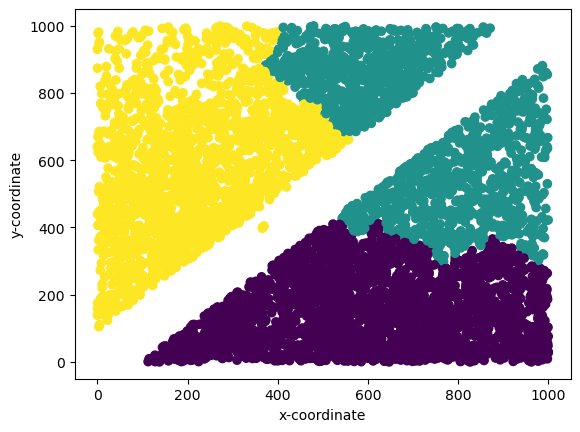

In [27]:
from sklearn.cluster import AgglomerativeClustering
k = 3

st = time.time()
model = AgglomerativeClustering(n_clusters=k)
model.fit(clocs[['x','y']])
et = time.time()
print('Fit time:', elapsed_time, 'seconds')
elapsed_time = et - st
labels = model.labels_
clocs['Depot'] = labels
d = clocs['Depot']

plt.scatter(x_vals, y_vals, c = d)
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.show()


Fit time: 0.6622271537780762 seconds


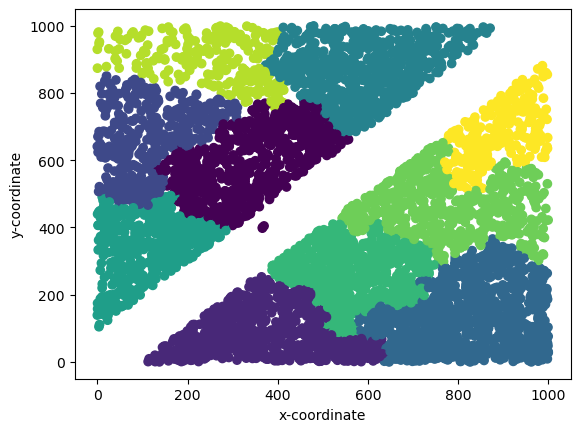

In [28]:
k = 10
clocs = clocs.drop(columns='Depot')
st = time.time()
model = AgglomerativeClustering(n_clusters=k)
model.fit(clocs[['x','y']])
et = time.time()
print('Fit time:', elapsed_time, 'seconds')
elapsed_time = et - st
labels = model.labels_
clocs['Depot'] = labels
d = clocs['Depot']

plt.scatter(x_vals, y_vals, c = d)
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.show()

### Results and conclusions
The fitting time does not seem to be increasing along with the increase in clusters in the k-means algorithm, in fact, in our limited testing the more clusters we had the faster the algorithm performed. I would be careful to draw conclusions from such limited testing though. In the Agglomerative clustering algorithm the performance seemed to be the same for 3 and for 10 clusters. Agglomerative seems slightly faster.

We can easily see that the k-means algorithm produces cleaner lines while the agglomerative produces more chaotic groupings. This might be partially because our geopgraphical feature throws off the agglomerative algorithm but also is probably inherent in the algorithm.




## Part 2: Association

Here we use a dataset containing anonymized lists of customers and which products which customer bought. Our goal is to create associative rules to see if there are any trends that could be exploited. 

We do our standard tricks, namely read our data in to dataframe, check for missing values and check how it looks:

In [31]:

prodgs = pd.read_csv('drone_prod_groups.csv')

In [32]:
prodgs.isnull().values.any()

False

In [33]:
prodgs.head()

,ID,Prod1,Prod2,Prod3,Prod4,Prod5,Prod6,Prod7,Prod8,Prod9,...,Prod11,Prod12,Prod13,Prod14,Prod15,Prod16,Prod17,Prod18,Prod19,Prod20
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,2,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,1,1,1,1,1
2,3,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
3,4,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
4,5,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,1


In [34]:
prodgs.dtypes

ID         int64
Prod1      int64
 Prod2     int64
 Prod3     int64
 Prod4     int64
 Prod5     int64
 Prod6     int64
 Prod7     int64
 Prod8     int64
 Prod9     int64
 Prod10    int64
 Prod11    int64
 Prod12    int64
 Prod13    int64
 Prod14    int64
 Prod15    int64
 Prod16    int64
 Prod17    int64
 Prod18    int64
 Prod19    int64
 Prod20    int64
dtype: object

We see that our data is in integers. To use our data we must change it to boolean values:

In [36]:
prodgs = prodgs.apply(lambda x: x.map(lambda y: True if y == 1 else False))
prodgs = prodgs.drop(columns='ID')



In [37]:
prodgs.head()

,Prod1,Prod2,Prod3,Prod4,Prod5,Prod6,Prod7,Prod8,Prod9,Prod10,Prod11,Prod12,Prod13,Prod14,Prod15,Prod16,Prod17,Prod18,Prod19,Prod20
0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True
1,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True
3,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,True


## Finding associations:

Here we check for frequent groupings of products:

In [39]:
frequent_prodsets = apriori(prodgs, min_support=0.1, use_colnames=True)
frequent_prodsets

,support,itemsets
0,0.10998,(Prod1)
1,0.13098,( Prod2)
2,0.10459,( Prod5)
3,0.13499,( Prod7)
4,0.16179,( Prod8)
5,0.19853,( Prod9)
6,0.10848,( Prod11)
7,0.15971,( Prod12)
8,0.14557,( Prod14)
9,0.11880,( Prod15)


Here we create our association rules according to our frequent product sets:

In [41]:
rules = association_rules(frequent_prodsets, metric='confidence', min_threshold=0.5)

rules = rules.sort_values(by='confidence', ascending=False)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,( Prod15),( Prod9),0.11880,0.19853,0.11145,0.938131,4.725388,0.087865,12.954372,0.894663
3,( Prod20),( Prod19),0.14798,0.20626,0.13476,0.910664,4.415125,0.104238,8.884845,0.907849
2,( Prod19),( Prod20),0.20626,0.14798,0.13476,0.653350,4.415125,0.104238,2.457869,0.974508
0,( Prod9),( Prod15),0.19853,0.11880,0.11145,0.561376,4.725388,0.087865,2.009011,0.983664


In [42]:
rules = association_rules(frequent_prodsets, metric='lift', min_threshold=2)

# sort in descending order of lift
rules = rules.sort_values(by='lift', ascending=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,( Prod9),( Prod15),0.19853,0.11880,0.11145,0.561376,4.725388,0.087865,2.009011,0.983664
1,( Prod15),( Prod9),0.11880,0.19853,0.11145,0.938131,4.725388,0.087865,12.954372,0.894663
2,( Prod19),( Prod20),0.20626,0.14798,0.13476,0.653350,4.415125,0.104238,2.457869,0.974508
3,( Prod20),( Prod19),0.14798,0.20626,0.13476,0.910664,4.415125,0.104238,8.884845,0.907849


We sort our associations first by confidence and then by lift. We do not have many pairings in this dataset with the values we have used. These could of course be tweaked to get weaker associations. 

### Results and conclusions

Our research found two stronger associations with product groups. There are clear associations with product groups 15 and 9 and product groups 19 and 20.

Based on our research we would recommend the store to place these groups of items closer together, both for customer satisfaction and for possible spur-of-the-moment purchases. Another strategy would be to place them far apart to cause customers to go through many different product areas. This depends on business strategy and type of store. 

We would also recommend advertising these products together for maximum effect.

